In [3]:
import os
import argparse
import time
from contextlib import contextmanager
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import sys
sys.path.append("../")
from oodeel.methods import MLS, Energy, Entropy, DKNN, Gram, Mahalanobis, ODIN, VIM
from methods import   K_Means_Mahalanobis, PCA_MAHALANOBIS, NMF_MAHALANOBIS, PCA_unique_class_KNN, PCA_Unique_Class_Mahalanobis, NMF_Unique_Classes_KNN, NMF_Unique_Class_Mahalanobis, NMF_NORM, CRAFT_PER_CLASS_NMF, CRAFT_PER_CLASS_NMF_V2
from methods_v2 import K_Means, NMF_KNN, PCA_KNN, NMF_CONCEPTS, CRAFT_CONCEPTS, PCA_NORM
from data_preprocessing import get_train_dataset_cifar10, get_test_dataset_cifar10, get_train_dataset_cifar100, get_test_dataset_cifar100, get_test_dataset_places365, get_test_dataset_svhn, get_test_dataset_texture, get_test_dataset_Tiny, get_test_dataset_NINCO, get_test_dataset_OpenImage_O, get_train_dataset_inaturalist, get_test_dataset_SSB_hard
from models import load_pretrained_weights_32
from oodeel.eval.metrics import bench_metrics
from oodeel.types import List
from oodeel.eval.plots import plot_ood_scores, plot_roc_curve, plot_2D_features, plot_3D_features
from sklearn.metrics import accuracy_score



# load the model with pretrained weights
model = load_pretrained_weights_32()

# 1a- load in-distribution dataset: CIFAR-10
ds_fit = get_train_dataset_cifar10()
ds_in = get_test_dataset_cifar10()
ds_out = get_test_dataset_svhn()
# 1b- load out-of-distribution datasets
# ds_out_dict = {
#             "cifar100": get_test_dataset_cifar100(),
#             "svhn" : get_test_dataset_svhn(),
#             "places365" : get_test_dataset_places365(),
#             "texture" : get_test_dataset_texture(),
#             "Tin": get_test_dataset_Tiny(),
#         }







checkpoint_path :  ../../models/CIFAR-10/cifar10_resnet18_32x32_base_e100_lr0.1_default/s0/best.ckpt
Model pretrained weight have been successfully loaded !
the length of the CIFAR-10 Training dataset :  50000
the length of the CIFAR-10 Test dataset :  10000
the length of the SVHN Test dataset :  26032


In [ ]:
# 2- instantiate the method
Kmeans = K_Means(n_centroids=10)
# 3- fit the method to the dataset
Kmeans.fit(model.to("cuda:1"), fit_dataset=ds_fit, feature_layers_id=[-2])


scores_in_kmeans, __kmeans = Kmeans.score(ds_in)
scores_out_kmeans, __kmeans = Kmeans.score(ds_out)

# === metrics ===
# auroc / fpr95
metrics = bench_metrics(
    (scores_in_kmeans, scores_out_kmeans),
    metrics=["auroc", "fpr95tpr"],
)
print("=== Metrics ===")
for k, v in metrics.items():
    print(f"{k:<10} {v:.6f}")

print("\n=== Plots ===")
# hists / roc
plt.figure(figsize=(9, 3))
plt.subplot(121)
plot_ood_scores(scores_in_kmeans, scores_out_kmeans, log_scale=False)
plt.subplot(122)
plot_roc_curve(scores_in_kmeans, scores_out_kmeans)
plt.tight_layout()
plt.show()


In [5]:
# 2- instantiate the method
MLS = MLS(output_activation="softmax")
# 3- fit the method to the dataset
MLS.fit(model.to("cuda:1"))


scores_in_MLS, __MLS = MLS.score(ds_in)
scores_out_MLS, __MLS = MLS.score(ds_out)

# === metrics ===
# auroc / fpr95
metrics = bench_metrics(
    (scores_in_MLS, scores_out_MLS),
    metrics=["auroc", "fpr95tpr"],
)
print("=== Metrics ===")
for k, v in metrics.items():
    print(f"{k:<10} {v:.6f}")

print("\n=== Plots ===")
# hists / roc
plt.figure(figsize=(9, 3))
plt.subplot(121)
plot_ood_scores(scores_in_MLS, scores_out_MLS, log_scale=False)
plt.subplot(122)
plot_roc_curve(scores_in_MLS, scores_out_MLS)
plt.tight_layout()
plt.show()


TypeError: OODBaseDetector.__call__() got an unexpected keyword argument 'output_activation'

=== Metrics ===
auroc      0.874495
fpr95tpr   0.294500

=== Plots ===


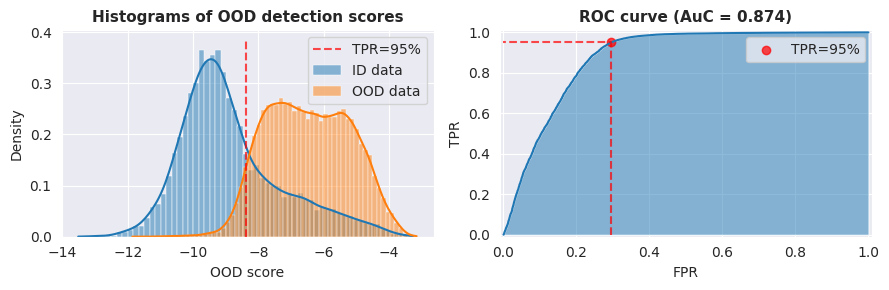

In [18]:
# 2- instantiate the method
Energy = Energy()
# 3- fit the method to the dataset
Energy.fit(model.to("cuda:1"))


scores_in_Energy, __Energy = Energy.score(ds_in)
scores_out_Energy, __Energy = Energy.score(ds_out)

# === metrics ===
# auroc / fpr95
metrics = bench_metrics(
    (scores_in_Energy, scores_out_Energy),
    metrics=["auroc", "fpr95tpr"],
)
print("=== Metrics ===")
for k, v in metrics.items():
    print(f"{k:<10} {v:.6f}")

print("\n=== Plots ===")
# hists / roc
plt.figure(figsize=(9, 3))
plt.subplot(121)
plot_ood_scores(scores_in_Energy, scores_out_Energy, log_scale=False)
plt.subplot(122)
plot_roc_curve(scores_in_Energy, scores_out_Energy)
plt.tight_layout()
plt.show()


extracting features .................................


Traceback (most recent call last):
  File "/home/bilal.el-manja/.conda/envs/oodeel2/lib/python3.11/multiprocessing/util.py", line 303, in _run_finalizers
    finalizer()
  File "/home/bilal.el-manja/.conda/envs/oodeel2/lib/python3.11/multiprocessing/util.py", line 227, in __call__
    res = self._callback(*self._args, **self._kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bilal.el-manja/.conda/envs/oodeel2/lib/python3.11/multiprocessing/util.py", line 136, in _remove_temp_dir
    rmtree(tempdir, onerror=onerror)
  File "/home/bilal.el-manja/.conda/envs/oodeel2/lib/python3.11/shutil.py", line 763, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/bilal.el-manja/.conda/envs/oodeel2/lib/python3.11/shutil.py", line 761, in rmtree
    os.rmdir(path, dir_fd=dir_fd)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-945dfbg4'


applying NMF .................................
fitting the KNN algorithm .................................
Done fitting ...........................
=== Metrics ===
auroc      0.884826
fpr95tpr   0.293700

=== Plots ===


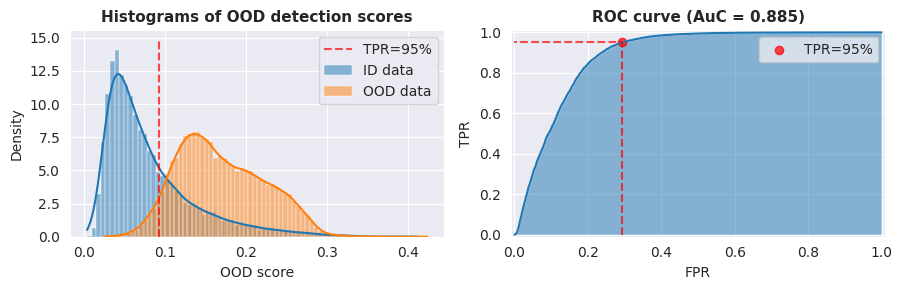

In [2]:
NMF = NMF_KNN(n_components=16)
NMF.fit(model.to("cuda:1"), fit_dataset=ds_fit, feature_layers_id=[-2])


scores_in_nmf, __nmf = NMF.score(ds_in)
scores_out_nmf, __nmf = NMF.score(ds_out)

# === metrics ===
# auroc / fpr95
metrics = bench_metrics(
    (scores_in_nmf, scores_out_nmf),
    metrics=["auroc", "fpr95tpr"],
)
print("=== Metrics ===")
for k, v in metrics.items():
    print(f"{k:<10} {v:.6f}")

print("\n=== Plots ===")
# hists / roc
plt.figure(figsize=(9, 3))
plt.subplot(121)
plot_ood_scores(scores_in_nmf, scores_out_nmf, log_scale=False)
plt.subplot(122)
plot_roc_curve(scores_in_nmf, scores_out_nmf)
plt.tight_layout()
plt.show()



checkpoint_path :  ../../models/CIFAR-10/cifar10_resnet18_32x32_base_e100_lr0.1_default/s0/best.ckpt
Model pretrained weight have been successfully loaded !
extracting features .................................
length of dataset :  50000
getting correctly classified samples .................................
accuracy of the model :  97.422


calculating NMF ...................................
calculating top important concepts ...................................
importances before :  [0.09575066 0.07890305 0.07403374 0.07050173 0.06205543 0.0705109
 0.06236502 0.06797845 0.06135023 0.06067648]
most important concepts :  [0 1 2 5 3 7 6 4 8 9]
importances after :  [0.09575066 0.07890305 0.07403374 0.07050173 0.06205543 0.0705109
 0.06236502 0.06797845 0.06135023 0.06067648]
applying KNN algorithm .............
=== Metrics ===
auroc      0.886868
fpr95tpr   0.236500

=== Plots ===


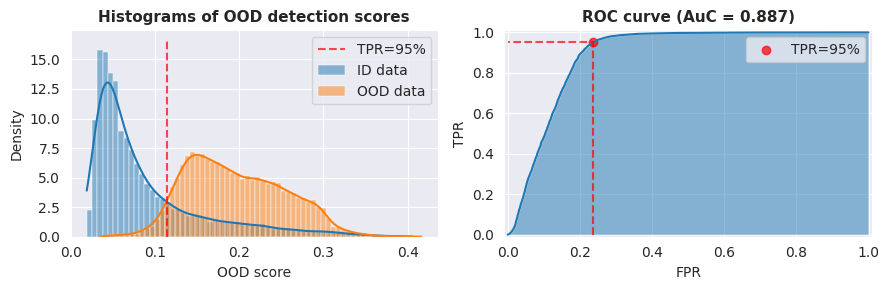

In [4]:
Craft = CRAFT_CONCEPTS(n_components=10, n_important_concepts=10, percentage_images_concept=0.8, model=load_pretrained_weights_32())
Craft.fit(model.to("cuda:1"), fit_dataset=ds_fit, feature_layers_id=[-2])

scores_in_craft, __craft = Craft.score(ds_in)
scores_out_craft, __craft = Craft.score(ds_out)

# === metrics ===
# auroc / fpr95
metrics = bench_metrics(
    (scores_in_craft, scores_out_craft),
    metrics=["auroc", "fpr95tpr"],
)
print("=== Metrics ===")
for k, v in metrics.items():
    print(f"{k:<10} {v:.6f}")

print("\n=== Plots ===")
# hists / roc
plt.figure(figsize=(9, 3))
plt.subplot(121)
plot_ood_scores(scores_in_craft, scores_out_craft, log_scale=False)
plt.subplot(122)
plot_roc_curve(scores_in_craft, scores_out_craft)
plt.tight_layout()
plt.show()




Test accuracy:	0.907000

=== Penultimate features viz ===


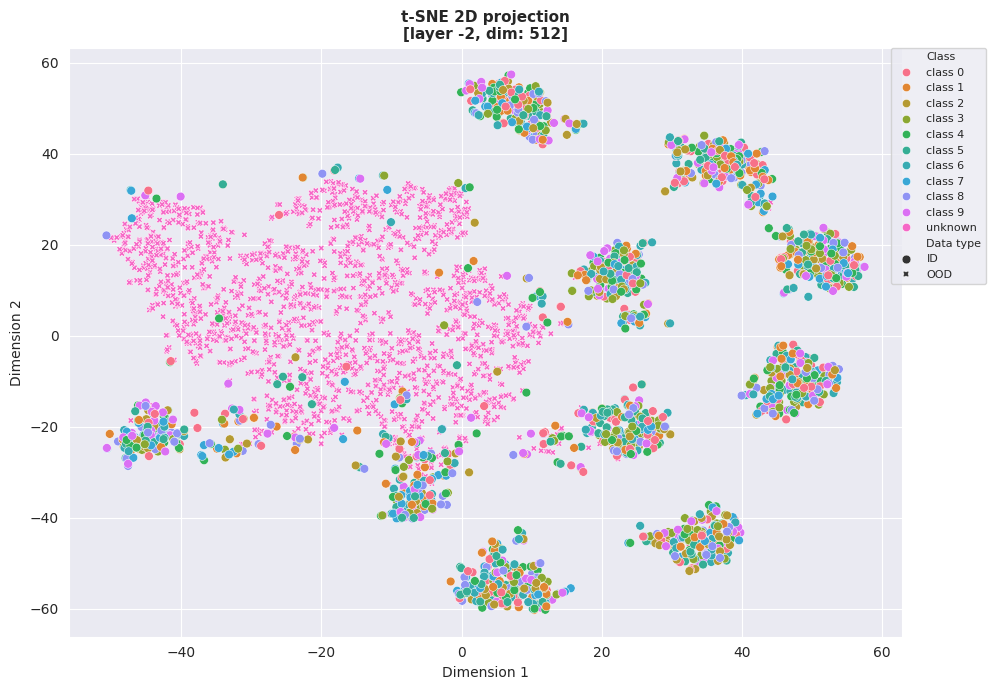

In [7]:
# evaluate model
model.eval()
labels, preds = [], []
for x, y in ds_in:
    x = x.to("cuda:1")
    preds.append(torch.argmax(model(x), dim=-1).detach().cpu())
    labels.append(y)
print(f"Test accuracy:\t{accuracy_score(torch.cat(labels), torch.cat(preds)):.6f}")

# penultimate features 2d visualization
print("\n=== Penultimate features viz ===")
plt.figure(figsize=(10, 7))
plot_2D_features(
    model=model,
    in_dataset=ds_in,
    out_dataset=ds_out,
    output_layer_id=-2,
)
plt.tight_layout()
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


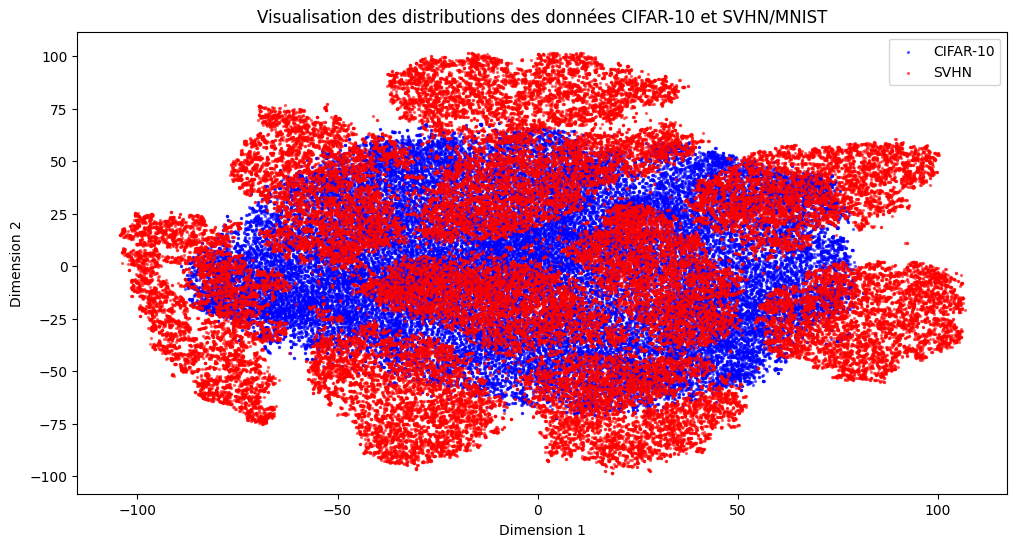

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from keras.datasets import cifar10, mnist
import scipy.io

# Charger CIFAR-10
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

# Charger SVHN
# svhn = scipy.io.loadmat('http://ufldl.stanford.edu/housenumbers/train_32x32.mat')
# x_train_svhn = np.moveaxis(svhn['X'], -1, 0)
# y_train_svhn = svhn['y']

# Charger MNIST
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
x_train_mnist = np.stack([x_train_mnist]*3, axis=-1) # Convertir en 3 canaux pour compatibilité

# Redimensionner les images en 2D (pour PCA et t-SNE)
x_train_cifar_flat = x_train_cifar.reshape(x_train_cifar.shape[0], -1)
# x_train_svhn_flat = x_train_svhn.reshape(x_train_svhn.shape[0], -1)
x_train_mnist_flat = x_train_mnist.reshape(x_train_mnist.shape[0], -1)

# Réduire les données à 50 dimensions avec PCA
pca = PCA(n_components=50)
x_train_cifar_pca = pca.fit_transform(x_train_cifar_flat)
# x_train_svhn_pca = pca.fit_transform(x_train_svhn_flat)
x_train_mnist_pca = pca.fit_transform(x_train_mnist_flat)

# Réduire les données à 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
x_train_cifar_tsne = tsne.fit_transform(x_train_cifar_pca)
# x_train_svhn_tsne = tsne.fit_transform(x_train_svhn_pca)
x_train_mnist_tsne = tsne.fit_transform(x_train_mnist_pca)

plt.figure(figsize=(12, 6))

# Visualiser CIFAR-10
plt.scatter(x_train_cifar_tsne[:, 0], x_train_cifar_tsne[:, 1], c='blue', label='CIFAR-10', alpha=0.5, s=2)

# Visualiser SVHN ou MNIST
plt.scatter(x_train_mnist_tsne[:, 0], x_train_mnist_tsne[:, 1], c='red', label='MNIST', alpha=0.5, s=2)
# plt.scatter(x_train_mnist_tsne[:, 0], x_train_mnist_tsne[:, 1], c='red', label='MNIST', alpha=0.5, s=2)

plt.legend()
plt.title('Visualisation des distributions des données CIFAR-10 et SVHN/MNIST')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


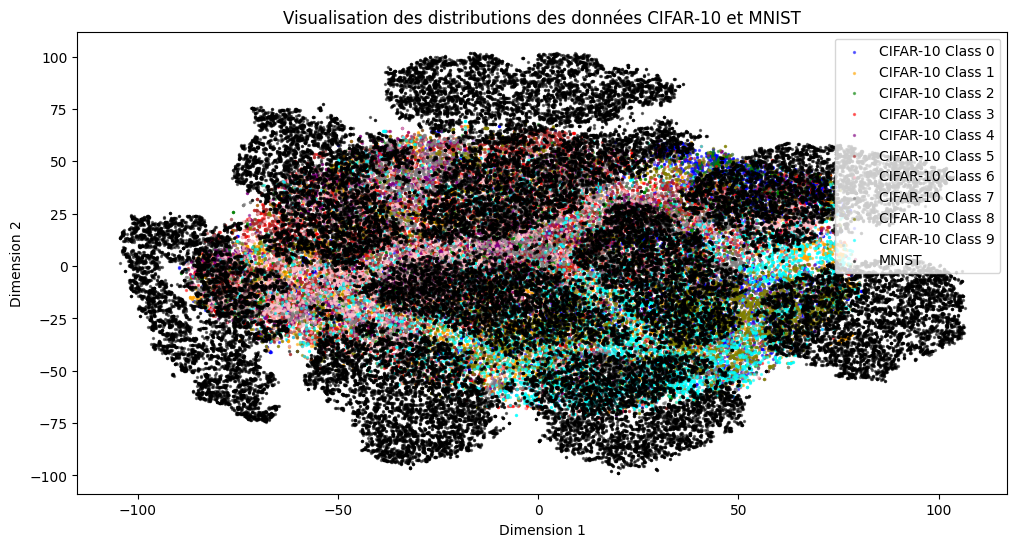

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from keras.datasets import cifar10, mnist

# Charger CIFAR-10
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

# Charger MNIST
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
x_train_mnist = np.stack([x_train_mnist]*3, axis=-1) # Convertir en 3 canaux pour compatibilité
x_train_mnist = np.pad(x_train_mnist, ((0,0), (2,2), (2,2), (0,0)), 'constant') # Redimensionner à 32x32

# Redimensionner les images en 2D (pour PCA et t-SNE)
x_train_cifar_flat = x_train_cifar.reshape(x_train_cifar.shape[0], -1)
x_train_mnist_flat = x_train_mnist.reshape(x_train_mnist.shape[0], -1)

# Réduire les données à 50 dimensions avec PCA
pca = PCA(n_components=50)
x_train_cifar_pca = pca.fit_transform(x_train_cifar_flat)
x_train_mnist_pca = pca.fit_transform(x_train_mnist_flat)

# Réduire les données à 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
x_train_cifar_tsne = tsne.fit_transform(x_train_cifar_pca)
x_train_mnist_tsne = tsne.fit_transform(x_train_mnist_pca)

# Définir les couleurs pour les classes CIFAR-10
colors_cifar = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

plt.figure(figsize=(12, 6))

# Visualiser CIFAR-10 avec des couleurs spécifiques pour chaque classe
for i in range(10):
    idx = np.where(y_train_cifar == i)[0]
    plt.scatter(x_train_cifar_tsne[idx, 0], x_train_cifar_tsne[idx, 1], c=colors_cifar[i], label=f'CIFAR-10 Class {i}', alpha=0.5, s=2)

# Visualiser MNIST avec une seule couleur
plt.scatter(x_train_mnist_tsne[:, 0], x_train_mnist_tsne[:, 1], c='black', label='MNIST', alpha=0.5, s=2)

plt.legend()
plt.title('Visualisation des distributions des données CIFAR-10 et MNIST')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


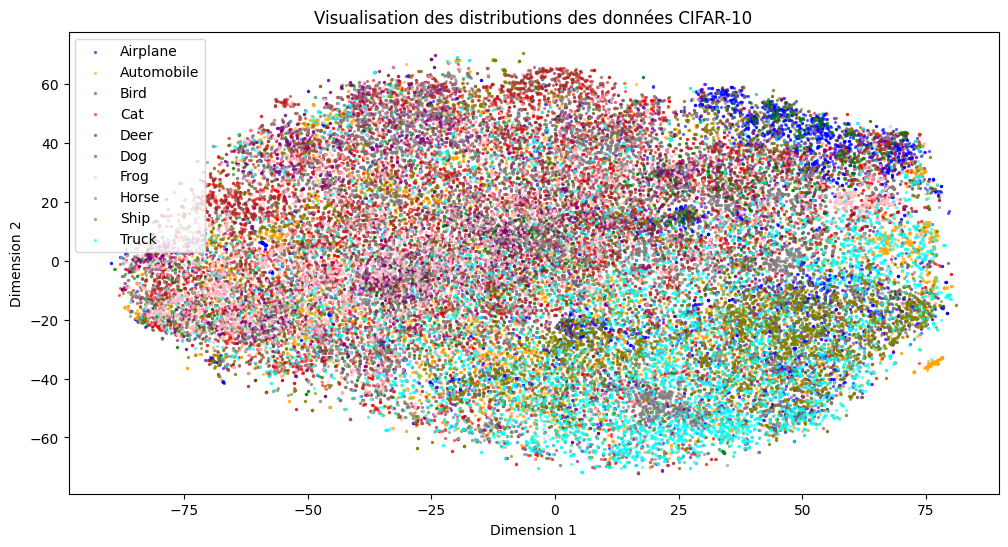

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from keras.datasets import cifar10, mnist

# Charger CIFAR-10
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

# Redimensionner les images en 2D (pour PCA et t-SNE)
x_train_cifar_flat = x_train_cifar.reshape(x_train_cifar.shape[0], -1)

# Réduire les données à 50 dimensions avec PCA
pca = PCA(n_components=50)
x_train_cifar_pca = pca.fit_transform(x_train_cifar_flat)

# Réduire les données à 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
x_train_cifar_tsne = tsne.fit_transform(x_train_cifar_pca)

# Définir les couleurs et les noms pour les classes CIFAR-10
colors_cifar = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
class_names_cifar = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(12, 6))

# Visualiser CIFAR-10 avec des couleurs spécifiques pour chaque classe
for i in range(10):
    idx = np.where(y_train_cifar == i)[0]
    plt.scatter(x_train_cifar_tsne[idx, 0], x_train_cifar_tsne[idx, 1], c=colors_cifar[i], label=class_names_cifar[i], alpha=0.5, s=2)

plt.legend()
plt.title('Visualisation des distributions des données CIFAR-10')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


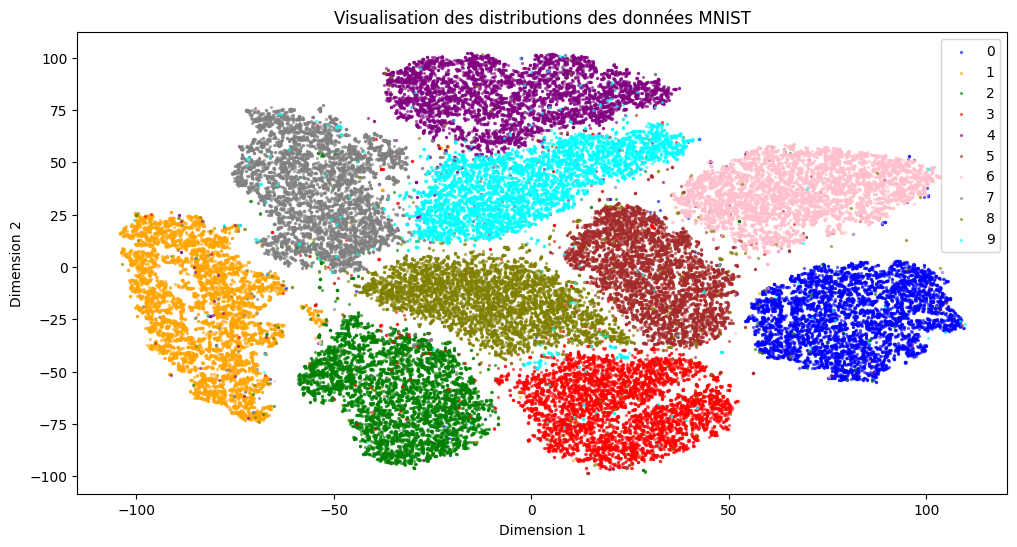

In [5]:
# Charger MNIST
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
x_train_mnist = np.stack([x_train_mnist]*3, axis=-1) # Convertir en 3 canaux pour compatibilité
x_train_mnist = np.pad(x_train_mnist, ((0,0), (2,2), (2,2), (0,0)), 'constant') # Redimensionner à 32x32

# Redimensionner les images en 2D (pour PCA et t-SNE)
x_train_mnist_flat = x_train_mnist.reshape(x_train_mnist.shape[0], -1)

# Réduire les données à 50 dimensions avec PCA
x_train_mnist_pca = pca.fit_transform(x_train_mnist_flat)

# Réduire les données à 2 dimensions avec t-SNE
x_train_mnist_tsne = tsne.fit_transform(x_train_mnist_pca)

# Définir les couleurs et les noms pour les classes MNIST
colors_mnist = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
class_names_mnist = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(12, 6))

# Visualiser MNIST avec des couleurs spécifiques pour chaque classe
for i in range(10):
    idx = np.where(y_train_mnist == i)[0]
    plt.scatter(x_train_mnist_tsne[idx, 0], x_train_mnist_tsne[idx, 1], c=colors_mnist[i], label=class_names_mnist[i], alpha=0.5, s=2)

plt.legend()
plt.title('Visualisation des distributions des données MNIST')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()
